### Questão 3:
Resolver 10 problemas de otimização multivariável sem restrições, obtidos do site [Test functions for optimization](https://en.wikipedia.org/wiki/Test_functions_for_optimization) ou de outras fontes (dadas as referências), usando 5 métodos de otimização e compará-los usando as 4 métricas de desempenho.


In [67]:
import numpy as np

import numpy as np
# F1 = Rastrigin Function
def F3(X):
    x, y = X
    A = 10
    return A*2 + (x**2 - A * np.cos(2 * np.pi * x)) + (y**2 - A * np.cos(2 * np.pi * y))

# F2 = Ackley Function
def F4(X):
    x, y = X
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20

# F3 = Sphere Function
def F1(X):
    x, y = X
    return x**2 + y**2

# F4 = Rosenbrock Function
def F2(X):
    x, y = X
    return 100 * (y - x**2)**2 + (1 - x)**2

# F5 = Beale Function
def F5(X):
    x, y = X
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

# F6 = Goldstein–Price Function
def F6(X):
    x, y = X
    return (1 + (x + y + 1)**2 * (19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2)) * (30 + (2*x - 3*y)**2 * (18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2))

# F7 = Booth Function
def F7(X):
    x, y = X
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

# F8 = Bukin Function N.6
def F8(X):
    x, y = X
    return 100 * np.sqrt(abs(y - 0.01*x**2)) + 0.01 * abs(x + 10)

# F9 = Matyas Function
def F9(X):
    x, y = X
    return 0.26 * (x**2 + y**2) - 0.48 * x * y

# F10 = Easom Function
def F10(X):
    x, y = X
    return -np.cos(x) * np.cos(y) * np.exp(-((x - np.pi)**2 + (y - np.pi)**2))

# Global Minima Dictionary
global_minimum = {
    # Rastrigin Function
    "F1": {
        "x": [0, 0],
        "Sx": 0
    },
    # Ackley Function
    "F2": {
        "x": [0, 0],
        "Sx": 0,
    },
    # Sphere Function
    "F3": {
        "x": [0, 0],
        "Sx": 0
    },
    # Rosenbrock Function
    "F4": {
        "x": [1, 1],
        "Sx": 0
    },
    # Beale Function
    "F5": {
        "x": [3, 0.5],
        "Sx": 0
    },
    # Goldstein–Price Function
    "F6": {
        "x": [0, -1],
        "Sx": 3
    },
    # Booth Function
    "F7": {
        "x": [1, 3],
        "Sx": 0
    },
    # Bukin Function N.6
    "F8": {
        "x": [-10, 1],
        "Sx": 0
    },
    # Matyas Function
    "F9": {
        "x": [0, 0],
        "Sx": 0
    },
    # Easom Function
    "F10": {
        "x": [np.pi, np.pi],
        "Sx": -1
    },
}


In [68]:
import time
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [81]:
# List of optimization methods
methods = ['nelder-mead', 'BFGS', 'CG', 'Powell', 'L-BFGS-B']

# List of test functions
functions = [F1, F2, F3, F4, F5, F6, F7, F8, F9, F10]

# Initial guess
X0 = [100, 100]

# Store results for each method and function
results = {method: [] for method in methods}

# Decorator to calculate execution time
def execution_time_decorator(func):
    def wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        execution_time = (end_time - start_time) * 1000  # milliseconds
        execution_time = round(execution_time, 4)
        return result, execution_time
    return wrapper

@execution_time_decorator
def execute_minimize(obj_function, method, x_init):
    result = minimize(obj_function, x_init, method=method)
    return result

# Run each method on each function
for method in methods:
    for i, func in enumerate(functions, start=1):
        R, T = execute_minimize(func, method, X0)
        results[method].append({
            'iterations': R.nit,
            'function_evaluations': R.nfev,
            'execution_time_ms': T,
            'solution': R.fun,
            'success': R.success
        })

In [ ]:
# Metrics calculation
metrics = {method: {'efficacy': 0, 'efficiency': 0, 'robustness': 0, 'quality': 0} for method in methods}

N = len(functions)

for method in methods:
    for i in range(N):
        T_star = min([results[m][i]['execution_time_ms'] for m in methods])
        S_star = min([results[m][i]['function_evaluations'] for m in methods])
        success = results[method][i]['success']
        
        metrics[method]['efficiency'] += 100 * (T_star / results[method][i]['execution_time_ms'])
        metrics[method]['quality'] += 100 * (S_star / results[method][i]['solution'])
        metrics[method]['robustness'] += 100 * success
        if success:
            metrics[method]['efficacy'] += 1

    metrics[method]['efficacy'] = (metrics[method]['efficacy'] / N) * 100
    metrics[method]['efficiency'] /= N
    metrics[method]['robustness'] /= N
    metrics[method]['quality'] /= N

# Display metrics
for method, values in metrics.items():
    print(f"{method} -> Efficacy: {values['efficacy']}%, Efficiency: {values['efficiency']}%, Robustness: {values['robustness']}%, Quality: {values['quality']}%")


C:\Users\UQK5\AppData\Local\Temp\ipykernel_10504\825045604.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\UQK5\AppData\Local\Temp\ipykernel_10504\825045604.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\UQK5\AppData\Local\Temp\ipykernel_10504\825045604.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\UQK5\AppData\Local\Temp\ipykernel_10504\825045604.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels

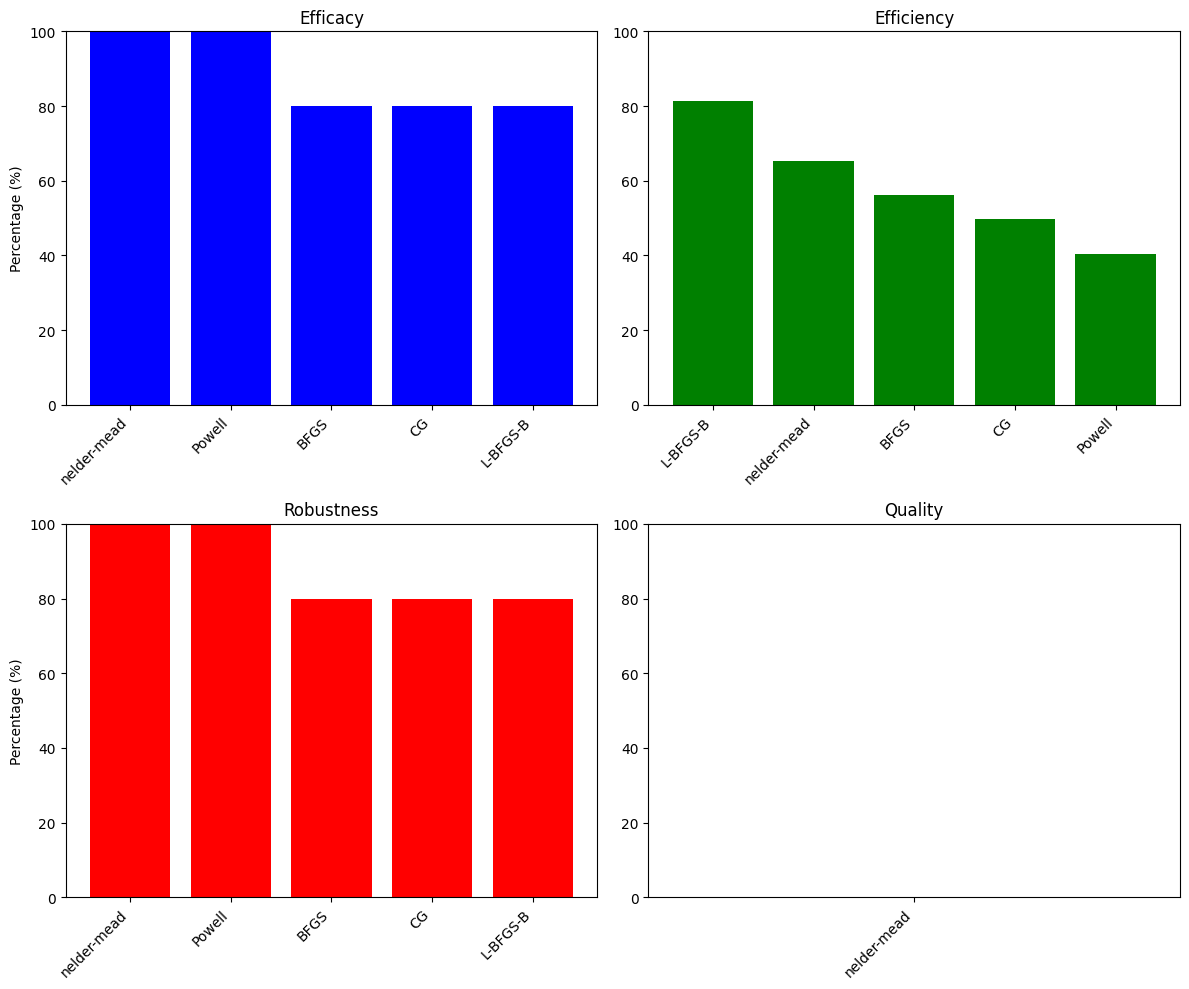

In [73]:
# Sorting metrics in descending order
efficacy_sorted = sorted(zip(methods, efficacy), key=lambda x: x[1], reverse=True)
efficiency_sorted = sorted(zip(methods, efficiency), key=lambda x: x[1], reverse=True)
robustness_sorted = sorted(zip(methods, robustness), key=lambda x: x[1], reverse=True)
quality_sorted = sorted(zip(methods, quality), key=lambda x: x[1], reverse=True)

# Extract sorted data
methods_efficacy, efficacy = zip(*efficacy_sorted)
methods_efficiency, efficiency = zip(*efficiency_sorted)
methods_robustness, robustness = zip(*robustness_sorted)
methods_quality, quality = zip(*quality_sorted)

# Plotting the sorted metrics comparison

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Efficacy
axs[0, 0].bar(methods_efficacy, efficacy, color='blue')
axs[0, 0].set_title('Efficacy')
axs[0, 0].set_ylabel('Percentage (%)')
axs[0, 0].set_ylim(0, 100)

# Efficiency
axs[0, 1].bar(methods_efficiency, efficiency, color='green')
axs[0, 1].set_title('Efficiency')
axs[0, 1].set_ylim(0, 100)

# Robustness
axs[1, 0].bar(methods_robustness, robustness, color='red')
axs[1, 0].set_title('Robustness')
axs[1, 0].set_ylabel('Percentage (%)')
axs[1, 0].set_ylim(0, 100)

# Quality
axs[1, 1].bar(methods_quality, quality, color='purple')
axs[1, 1].set_title('Quality')
axs[1, 1].set_ylim(0, 100)

# Set a common x-label for all plots
for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

